## 作业1：跳伞运动员仿真
   一名高空跳伞运动员从飞机上跳下，能够确定海拔高度和运动员自由下落的速度吗？在上一个实例中，炮弹总是保持$500m/s$的水平初速度（知道落入海中）。实际情况下，空气的摩擦阻力将使炮弹减速。同样，作用在运动员身上的重力同样受到空气摩擦力的影响，并随着运动员速度的增加而变大。最终，这一阻力将导致向上的摩擦力与向下的重力平衡，使合外力为零。在这一点，运动员将不再加速并保持稳态速度。
    根据基本空气动力学理论，运动员所受阻力由下式表示：
$$drag={1\over2}\rho v^2SC_d$$
式中，$\rho$为空气密度，$v$为速度，$S$为表面积，$C_d$为阻力系数。
    该公式的计算显然比较复杂。首先，空气密度$\rho$随着海拔高度而变化；第二，总阻力随着速度的平方变化；第三，运动员的表面积随着其运动而变化；最后，阻力系数取决于运动员伞具采用材料的摩擦力系数。这四个变量都是非线性的，因此很难推导出这个公式的显式解。
    为简化这个问题，假设$\rho=1.225kg/m^3$，$S=1.0m^2$，$C_d=0.05$，因此仅有$v$为非线性项。使用Euler法模拟整个运动过程，而不是直接求解公式。
    改变伞打开的时间，观察跳伞运动员的运动状态变化。

In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [2]:
Rho=1.225#空气密度
Cd=0.05  #阻力系数
M=85.0  #运动员质量
g = 9.8  #重力加速度
S1=1.0#开伞前表面积
S2=10.0#开伞后表面积

10.0

In [3]:
init_z = State(y=3000.0,v=0.0)
t1=15
t_end=50
h=0.01
system_z = System (init=init_z, t_0=0, t_end=t_end,dt=h)

,values
init,y 3000.0 v 0.0 dtype: float64
t_0,0
t_end,50
dt,1


In [4]:
def Free_fall(state, t, system):
    y, v = state
    dt=h
    dydt=v+((g-0.5*Rho*v*v*S1*Cd/M))*dt
    y=y-0.5*(dydt+v)*dt
    
    return State(v=dydt,y=y)

In [5]:

def Open_parachute(state,t,system):
    y,v=state
    dt=h
    dvdt=g-0.5*Rho*v*v*S2*Cd/M
    if dvdt>0:
        dydt=v+(g-0.5*Rho*v*v*S2*Cd/M)*dt
        y=y-0.5*(dydt+v)*dt
    else:
        dydt = v-(0.5*Rho*v*v*S2*Cd/M-g)*dt
        y=y-0.5*(dydt+v)*dt
    return State(v=dydt,y=y)

In [6]:
def run_simulation(system,Open_parachute,Free_fall):
  
    init = system.init
    t_0, t_end, dt = system.t_0, system.t_end, system.dt
    
    frame = TimeFrame(columns=init.index)
    frame.row[t_0] = init
    ts= linrange(t_0, t_end, dt)
    for t in ts:
        if t<t1:
            frame.row[t+dt] =Free_fall (frame.row[t], t, system)
        else:
                frame.row[t+dt] = Open_parachute(frame.row[t], t, system)
    
    return frame

In [7]:
results = run_simulation(system_z,Open_parachute,Free_fall)

,y,v
0,3000.000000,0.000000
1,2995.100000,9.800000
2,2980.417301,19.565397
3,2956.020865,29.227475
4,2922.047280,38.719695
5,2878.697664,47.979537
6,2826.232831,56.950127
7,2764.966978,65.581579
8,2695.260201,73.831974
9,2617.510237,81.667953


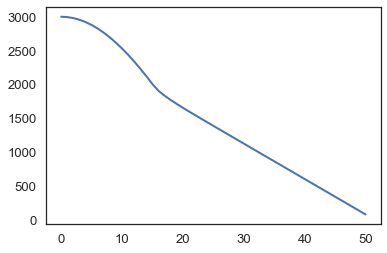

In [8]:
plot(results.y)

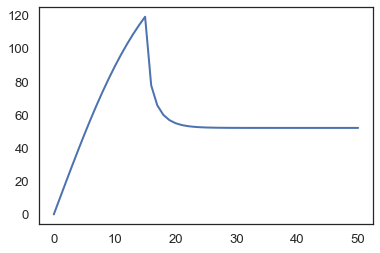

In [9]:
plot(results.v)